In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/2433p3

/content/drive/.shortcut-targets-by-id/1PyNndwNok2tdNSFvdDeuxmUcVf7PMhv5/2433p3


In [3]:
ls

 catboost_info/            heart_2020_cleaned.csv
'Copy of ML Model.ipynb'  'ML Model.ipynb'


In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve

##Load Data

In [5]:
df = pd.read_csv("heart_2020_cleaned.csv")

In [6]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [7]:
print(df["HeartDisease"].value_counts())

No     292422
Yes     27373
Name: HeartDisease, dtype: int64


In [8]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

##Data Cleaning

In [9]:
df.HeartDisease = df.HeartDisease.replace({"Yes": 1, "No": 0})
df.Smoking = df.Smoking.replace({"Yes": 1, "No": 0})
df.AlcoholDrinking = df.AlcoholDrinking.replace({"Yes": 1, "No": 0})
df.Stroke = df.Stroke.replace({"Yes": 1, "No": 0})
df.DiffWalking = df.DiffWalking.replace({"Yes": 1, "No": 0})
df.Sex = df.Sex.replace({"Female": 1, "Male": 0})
df.PhysicalActivity	= df.PhysicalActivity.replace({"Yes": 1, "No": 0})
df.Asthma	= df.Asthma.replace({"Yes": 1, "No": 0})
df.KidneyDisease = df.KidneyDisease.replace({"Yes": 1, "No": 0})
df.SkinCancer = df.SkinCancer.replace({"Yes": 1, "No": 0})

In [10]:
df = pd.get_dummies(data=df, columns=['AgeCategory', 'Diabetic', 'Race', 'GenHealth'])

##Train-Test Split

In [11]:
y = df.HeartDisease	
X = df.drop(['HeartDisease'], axis = 1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
# process imbalance data
oversample = SMOTE(k_neighbors=2)
X_train, y_train = oversample.fit_resample(X_train, y_train)

##Logistic Regression

In [14]:
reg_log = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
print(classification_report(y_test, pred_reglog))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     96385
           1       0.23      0.53      0.32      9148

    accuracy                           0.80    105533
   macro avg       0.59      0.68      0.60    105533
weighted avg       0.89      0.80      0.84    105533



In [37]:
pred_reglog = reg_log.predict_proba(X_test)

##Random Forest

In [17]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [18]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.76      0.84     96385
           1       0.20      0.66      0.31      9148

    accuracy                           0.75    105533
   macro avg       0.58      0.71      0.58    105533
weighted avg       0.89      0.75      0.80    105533



In [36]:
pred_rf = rf.predict_proba(X_test)

##XGBoost

In [19]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

In [20]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     96385
           1       0.23      0.67      0.34      9148

    accuracy                           0.78    105533
   macro avg       0.60      0.73      0.61    105533
weighted avg       0.90      0.78      0.82    105533



In [35]:
pred_xgb = xgb.predict_proba(X_test)

##Catboost

In [21]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 151.6 MB/s 


In [22]:
from catboost import CatBoostClassifier

In [23]:
cat = CatBoostClassifier(iterations=100, learning_rate=0.03, depth=2)
cat.fit(X_train, y_train)
pred_cat = cat.predict_proba(X_test)

0:	learn: 0.6883353	total: 75.2ms	remaining: 7.44s
1:	learn: 0.6837377	total: 98.6ms	remaining: 4.83s
2:	learn: 0.6793455	total: 124ms	remaining: 4s
3:	learn: 0.6752784	total: 159ms	remaining: 3.81s
4:	learn: 0.6715167	total: 198ms	remaining: 3.77s
5:	learn: 0.6664550	total: 223ms	remaining: 3.49s
6:	learn: 0.6629132	total: 249ms	remaining: 3.31s
7:	learn: 0.6583140	total: 275ms	remaining: 3.16s
8:	learn: 0.6551109	total: 304ms	remaining: 3.07s
9:	learn: 0.6520319	total: 327ms	remaining: 2.95s
10:	learn: 0.6479262	total: 350ms	remaining: 2.83s
11:	learn: 0.6448332	total: 375ms	remaining: 2.75s
12:	learn: 0.6409421	total: 397ms	remaining: 2.66s
13:	learn: 0.6373770	total: 419ms	remaining: 2.58s
14:	learn: 0.6346388	total: 447ms	remaining: 2.53s
15:	learn: 0.6321579	total: 477ms	remaining: 2.5s
16:	learn: 0.6288322	total: 502ms	remaining: 2.45s
17:	learn: 0.6264288	total: 537ms	remaining: 2.44s
18:	learn: 0.6241848	total: 563ms	remaining: 2.4s
19:	learn: 0.6212305	total: 589ms	remaining:

In [24]:
print(classification_report(y_test, pred_cat))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     96385
           1       0.22      0.68      0.34      9148

    accuracy                           0.77    105533
   macro avg       0.59      0.73      0.60    105533
weighted avg       0.90      0.77      0.81    105533



In [34]:
pred_cat = cat.predict_proba(X_test)

In [25]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [27]:
roc_curve(y_test, pred_reglog)

(array([0.        , 0.17070084, 1.        ]),
 array([0.        , 0.52874945, 1.        ]),
 array([2, 1, 0]))

In [ ]:
# "#C06C84"

In [39]:
pred_reglog

array([[0.9885069 , 0.0114931 ],
       [0.99170005, 0.00829995],
       [0.9752619 , 0.0247381 ],
       ...,
       [0.49868921, 0.50131079],
       [0.20044085, 0.79955915],
       [0.83715065, 0.16284935]])

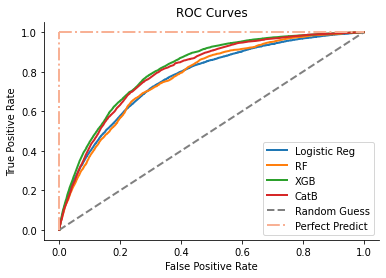

In [49]:
lw = 2
fpr1, tpr1, _ = roc_curve(y_test, pred_reglog[:, 1])
fpr2, tpr2, _ = roc_curve(y_test, pred_rf[:, 1])
fpr3, tpr3, _ = roc_curve(y_test, pred_xgb[:, 1])
fpr4, tpr4, _ = roc_curve(y_test, pred_cat[:, 1])
# roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
# roc_display.figure_.set_size_inches(5,5)
plt.plot(fpr1, tpr1, lw=lw, label="Logistic Reg")
plt.plot(fpr2, tpr2, lw=lw, label="RF")
plt.plot(fpr3, tpr3, lw=lw, label="XGB")
plt.plot(fpr4, tpr4, lw=lw, label="CatB")
plt.title("ROC Curves")
plt.plot([0, 1], [0, 1], lw=lw, color = 'gray', linestyle="--", label = 'Random Guess')
plt.plot([0, 1], [1, 1], color = '#f8B195', lw=lw, linestyle="-.", label = 'Perfect Predict')
plt.plot([0, 0], [0, 1], color = '#f8B195', lw=lw, linestyle="-.")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()